In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
import os
os.chdir('/content/drive/MyDrive/Colab_Notebooks/coursera/coursera_Probabilistic_Deep_Learning_TF2/Week4')

In [ ]:
!pip install tensorflow=='2.2.0'

     |████████████████████████████████| 516.2 MB 3.3 kB/s 
     |████████████████████████████████| 2.9 MB 91.5 MB/s 
     |████████████████████████████████| 454 kB 51.9 MB/s 
     |████████████████████████████████| 3.0 MB 73.4 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.7.0
    Uninstalling tensorflow-estimator-2.7.0:
      Successfully uninstalled tensorflow-estimator-2.7.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.7.0
    Uninstalling tensorboard-2.7.0:
      Successfully uninstalled tensorboard-2.7.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
  Attempting uninstall: gast
    Found existing installation: gast 0.4.0
    Uninstalling gast-0.4.0:
      Successfully uninstalled gast-0.4.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.7.0
    Uninstalli

In [ ]:
!pip install tensorflow_probability=='0.10.0'

     |████████████████████████████████| 3.5 MB 14.3 MB/s 
  Attempting uninstall: tensorflow-probability
    Found existing installation: tensorflow-probability 0.15.0
    Uninstalling tensorflow-probability-0.15.0:
      Successfully uninstalled tensorflow-probability-0.15.0


In [ ]:
import tensorflow as tf
import tensorflow_probability as tfp
tfd = tfp.distributions
tfpl = tfp.layers
tfb = tfp.bijectors
print("TF version:", tf.__version__)
print("TFP version:", tfp.__version__)

TF version: 2.2.0
TFP version: 0.10.0


# Variational autoencoders

## Coding tutorials

#### [1. Encoders and decoders](#tutorial1)
#### [2. Minimising Kullback-Leibler divergence](#tutorial2)
#### [3. Maximising the ELBO](#tutorial3)
#### [4. KL divergence layers](#tutorial4)

***
<a class="anchor" id="tutorial1"></a>
## Encoders and decoders

In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Flatten, Reshape
from tensorflow import keras
import tensorflow.keras.layers as layers
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
# Load Fashion MNIST

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
x_train = x_train.astype('float32')/255.
x_test = x_test.astype('float32')/255.
class_names = np.array(['T-shirt/top', 'Trouser/pants', 'Pullover shirt', 'Dress',
                        'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag','Ankle boot'])

4423680/4422102 [==============================] - 0s 0us/step


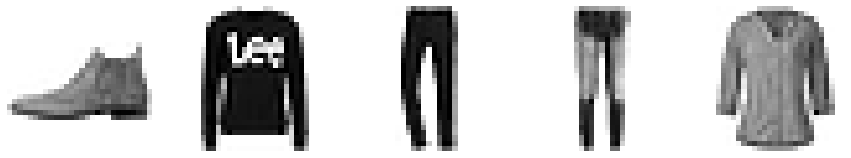

In [ ]:
# Display a few examples

n_examples = 1000
example_images = x_test[0:n_examples]
example_labels = y_test[0:n_examples]

f, axs = plt.subplots(1, 5, figsize=(15, 4))
for j in range(len(axs)):
    axs[j].imshow(example_images[j], cmap='binary')
    axs[j].axis('off')

In [ ]:
# Define the encoder
def create_encoder(encoded_dim=2):
  inputs=keras.Input(shape=(28,28))
  l=layers.Flatten()(inputs)
  l=layers.Dense(256,activation='sigmoid')(l)
  l=layers.Dense(64,activation='sigmoid')(l)
  outputs=layers.Dense(encoded_dim)(l)
  encoder=keras.Model(inputs=inputs,outputs=outputs)
  return encoder

encoder=create_encoder()

In [ ]:
# Encode examples before training
pretrain_example_encodings=encoder(example_images).numpy()


In [ ]:
pretrain_example_encodings[:, 0].shape

(1000,)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


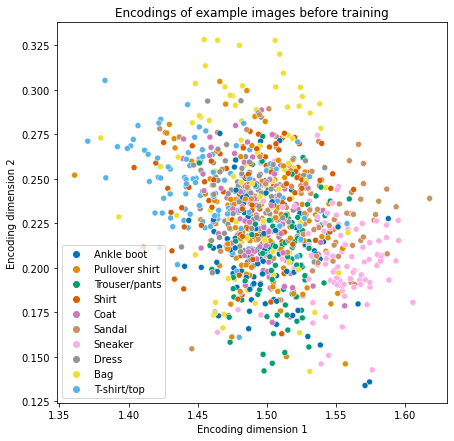

In [ ]:
# Plot encoded examples before training 

f, ax = plt.subplots(1, 1, figsize=(7, 7))
sns.scatterplot(pretrain_example_encodings[:, 0],
                pretrain_example_encodings[:, 1],
                hue=class_names[example_labels], ax=ax,
                palette=sns.color_palette("colorblind", 10));
ax.set_xlabel('Encoding dimension 1'); ax.set_ylabel('Encoding dimension 2')
ax.set_title('Encodings of example images before training');

In [ ]:
# Define the decoder
def create_decoder(encoded_dim=2):
  inputs=keras.Input(shape=(encoded_dim,))
  l=layers.Dense(64,activation='sigmoid')(inputs)
  l=layers.Dense(256,activation='sigmoid')(l)
  l=layers.Dense(28*28,activation='sigmoid')(l)
  outputs=Reshape((28,28))(l)
  decoder=keras.Model(inputs=inputs,outputs=outputs)
  return decoder

decoder=create_decoder()


In [ ]:
# Compile and fit the model

autoencoder=Model(inputs=encoder.inputs,outputs=decoder(encoder.outputs))

# Specify loss - input and output is in [0., 1.], so we can use a binary cross-entropy loss
autoencoder.compile(loss='binary_crossentropy')

# Fit model - highlight that labels and input are the same
autoencoder.fit(x=x_train,y=x_train,epochs=10,batch_size=32)


Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4012
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3421
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3333
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3290
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3262
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3243
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3229
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3218
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3208
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3200


In [ ]:
# Compute example encodings after training
posttrain_example_encodings=encoder(example_images).numpy()


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


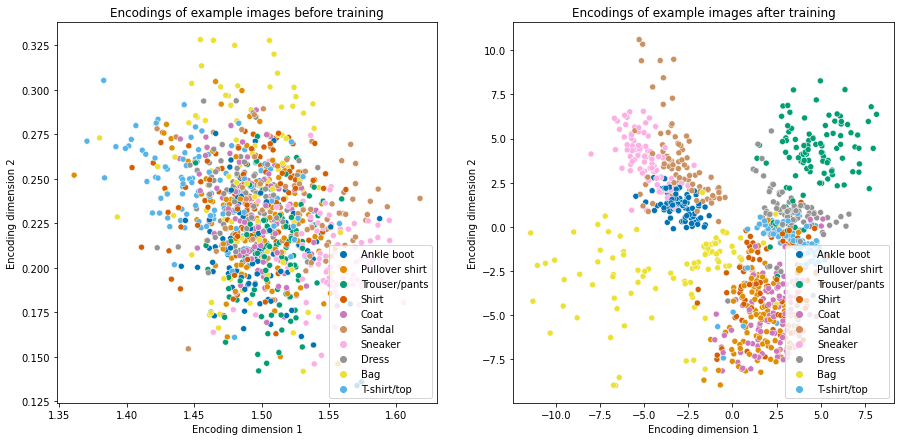

In [ ]:
# Compare the example encodings before and after training

f, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))
sns.scatterplot(pretrain_example_encodings[:, 0],
                pretrain_example_encodings[:, 1],
                hue=class_names[example_labels], ax=axs[0],
                palette=sns.color_palette("colorblind", 10));
sns.scatterplot(posttrain_example_encodings[:, 0],
                posttrain_example_encodings[:, 1],
                hue=class_names[example_labels], ax=axs[1],
                palette=sns.color_palette("colorblind", 10));

axs[0].set_title('Encodings of example images before training');
axs[1].set_title('Encodings of example images after training');

for ax in axs: 
    ax.set_xlabel('Encoding dimension 1')
    ax.set_ylabel('Encoding dimension 2')
    ax.legend(loc='lower right')

In [ ]:
# Compute the autoencoder's reconstructions
reconstructed_example_images=autoencoder(example_images)


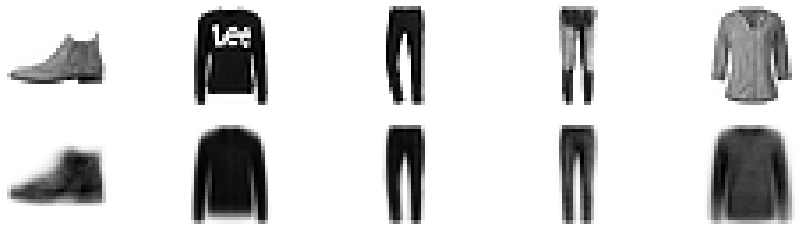

In [ ]:
# Evaluate the autoencoder's reconstructions

f, axs = plt.subplots(2, 5, figsize=(15, 4))
for j in range(5):
    axs[0, j].imshow(example_images[j], cmap='binary')
    axs[1, j].imshow(reconstructed_example_images[j].numpy().squeeze(), cmap='binary')
    axs[0, j].axis('off')
    axs[1, j].axis('off')

***
<a class="anchor" id="tutorial2"></a>
## Minimising Kullback-Leibler divergence

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output

In [ ]:
# Define a target distribution, p
tf.random.set_seed(41)

p_mu=[0.,0.]
p_L=tfb.Chain([tfb.TransformDiagonal(tfb.Softplus()),
               tfb.FillTriangular()])(tf.random.uniform([3]))
p=tfd.MultivariateNormalTriL(loc=p_mu,scale_tril=p_L)
p

<tfp.distributions.MultivariateNormalTriL 'MultivariateNormalTriL' batch_shape=[] event_shape=[2] dtype=float32>

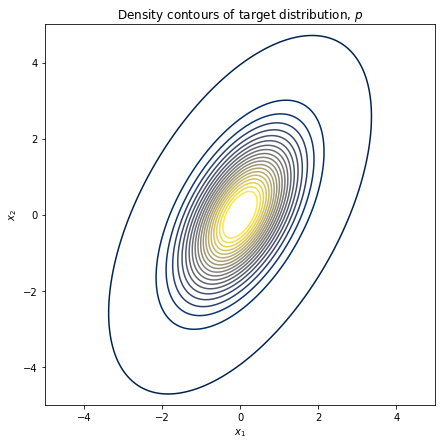

In [ ]:
# Plot the target distribution's density contours

def plot_density_contours(density, X1, X2, contour_kwargs, ax=None):
    '''
        Plots the contours of a bivariate TensorFlow density function (i.e. .prob()).
        X1 and X2 are numpy arrays of mesh coordinates.
    '''
    X = np.hstack([X1.flatten()[:, np.newaxis], X2.flatten()[:, np.newaxis]])
    density_values = np.reshape(density(X).numpy(), newshape=X1.shape)
    
    if ax==None:
        _, ax = plt.subplots(figsize=(7, 7))
    
    ax.contour(X1, X2, density_values, **contour_kwargs)
    return(ax)

x1 = np.linspace(-5, 5, 1000)
x2 = np.linspace(-5, 5, 1000)
X1, X2 = np.meshgrid(x1, x2)
f, ax = plt.subplots(1, 1, figsize=(7, 7))

# Density contours are linearly spaced
contour_levels = np.linspace(1e-4, 10**(-0.8), 20) # specific to this seed
ax = plot_density_contours(p.prob, X1, X2, 
                           {'levels':contour_levels, 
                            'cmap':'cividis'}, ax=ax)
ax.set_xlim(-5, 5); ax.set_ylim(-5, 5); 
ax.set_title('Density contours of target distribution, $p$')
ax.set_xlabel('$x_1$'); ax.set_ylabel('$x_2$');

In [ ]:
# Initialize an approximating distribution, q, that has diagonal covariance
tf.random.set_seed(41)
q=tfd.MultivariateNormalDiag(loc=tf.Variable(tf.random.normal([2])),
                                             scale_diag=tfp.util.TransformedVariable(tf.random.uniform([2]),
                                                                                     bijector=tfb.Exp()))
q


<tfp.distributions.MultivariateNormalDiag 'MultivariateNormalDiag' batch_shape=[] event_shape=[2] dtype=float32>

In [ ]:
# Define a function for the Kullback-Leibler divergence
@tf.function
def loss_and_grads(dist_a,dist_b):
  with tf.GradientTape() as tape:
    loss=tfd.kl_divergence(dist_a,dist_b)
  return loss,tape.gradient(loss,dist_a.trainable_variables)


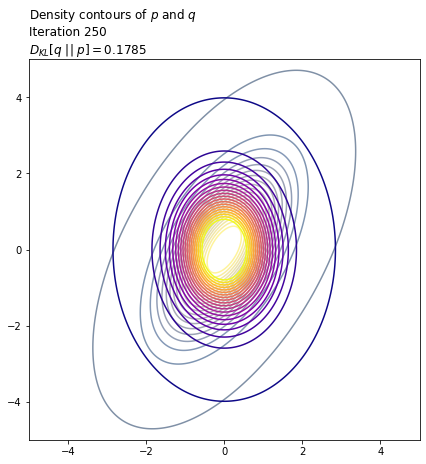

In [ ]:
# Run a training loop that computes KL[q || p], updates q's parameters using its gradients

num_train_steps = 250
opt = tf.keras.optimizers.Adam(learning_rate=.01)
for i in range(num_train_steps):
    
    # Compute the KL divergence and its gradients
    q_loss, grads = loss_and_grads(q, p)
    
    # Update the trainable variables using the gradients via the optimizer
    opt.apply_gradients(zip(grads, q.trainable_variables))
    
    # Plot the updated density 
    if ((i + 1) % 10 == 0):
        clear_output(wait=True)
        ax = plot_density_contours(p.prob, X1, X2,
                                   {'levels':contour_levels,
                                    'cmap':'cividis', 'alpha':0.5})
        ax = plot_density_contours(q.prob, X1, X2, 
                                   {'levels':contour_levels,
                                    'cmap':'plasma'}, ax=ax)
        ax.set_title('Density contours of $p$ and $q$\n' +
                     'Iteration ' + str(i + 1) + '\n' +
                      '$D_{KL}[q \ || \ p] = ' + 
                      str(np.round(q_loss.numpy(), 4)) + '$',
                      loc='left')
        plt.pause(.01)

In [ ]:
# Re-fit the distribution, this time fitting q_rev by minimising KL[p || q_rev]
tf.random.set_seed(41)
q_rev=tfd.MultivariateNormalDiag(loc=tf.Variable(tf.random.normal([2])),
                                             scale_diag=tfp.util.TransformedVariable(tf.random.uniform([2]),
                                                                                     bijector=tfb.Exp()))
q_rev


<tfp.distributions.MultivariateNormalDiag 'MultivariateNormalDiag' batch_shape=[] event_shape=[2] dtype=float32>

In [ ]:
# Edit loss_and_grads function
@tf.function
def loss_and_grads(dist_a,dist_b,reverse=False):
  with tf.GradientTape() as tape:
    if not reversed:
      loss=tfd.kl_divergence(dist_a,dist_b)
    else:
      loss=tfd.kl_divergence(dist_b,dist_a)
  return loss,tape.gradient(loss,dist_a.trainable_variables)


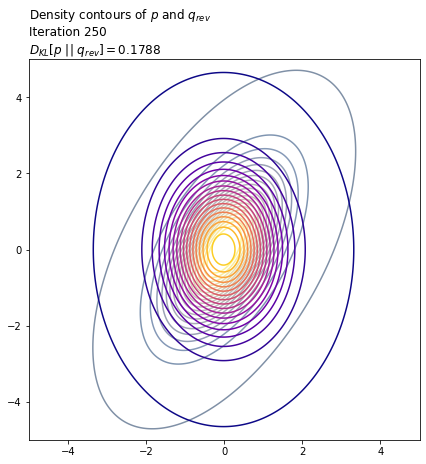

In [ ]:
# Re-initialize optimizer, run training loop

opt = tf.keras.optimizers.Adam(learning_rate=.01)
for i in range(num_train_steps):
    # Reverse the KL divergence terms - compute KL[p || q_rev] 
    q_rev_loss, grads = loss_and_grads(q_rev, p, reverse=True)
    
    # Update the trainable variables using the gradients via the optimizer
    opt.apply_gradients(zip(grads, q_rev.trainable_variables))
    
    # Plot the updated density 
    if ((i + 1) % 10 == 0):
        clear_output(wait=True)
        ax = plot_density_contours(p.prob, X1, X2,
                                   {'levels':contour_levels,
                                    'cmap':'cividis', 'alpha':0.5})
        ax = plot_density_contours(q_rev.prob, X1, X2, 
                                   {'levels':contour_levels,
                                    'cmap':'plasma'}, ax=ax)
        ax.set_title('Density contours of $p$ and $q_{rev}$\n' +
                     'Iteration ' + str(i + 1) + '\n' +
                      '$D_{KL}[p \ || \ q_{rev}] = ' + 
                      str(np.round(q_rev_loss.numpy(), 4)) + '$',
                      loc='left')
        plt.pause(.01)

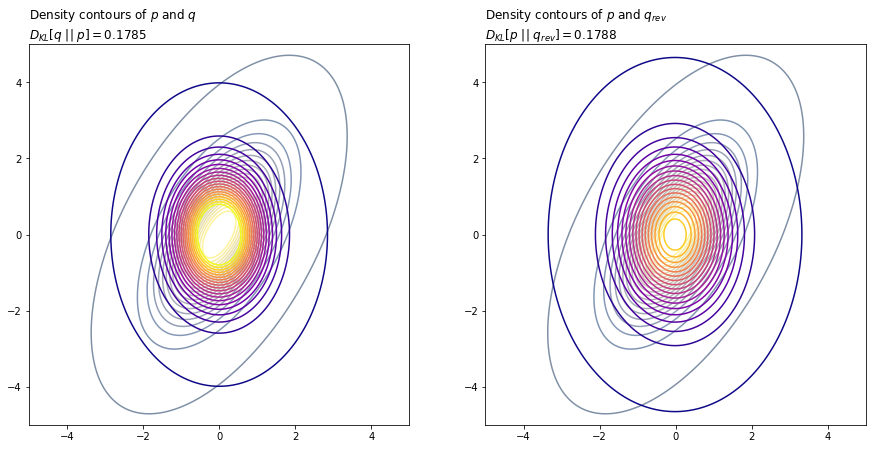

In [ ]:
# Plot q and q_rev alongside one another

f, axs = plt.subplots(1, 2, figsize=(15, 7))

axs[0] = plot_density_contours(p.prob, X1, X2,
                           {'levels':contour_levels,
                            'cmap':'cividis', 'alpha':0.5}, ax=axs[0])
axs[0] = plot_density_contours(q.prob, X1, X2, 
                           {'levels':contour_levels,
                            'cmap':'plasma'}, ax=axs[0])
axs[0].set_title('Density contours of $p$ and $q$\n' +
              '$D_{KL}[q \ || \ p] = ' + str(np.round(q_loss.numpy(), 4)) + '$',
              loc='left')

axs[1] = plot_density_contours(p.prob, X1, X2,
                           {'levels':contour_levels,
                            'cmap':'cividis', 'alpha':0.5}, ax=axs[1])
axs[1] = plot_density_contours(q_rev.prob, X1, X2, 
                           {'levels':contour_levels,
                            'cmap':'plasma'}, ax=axs[1])
axs[1].set_title('Density contours of $p$ and $q_{rev}$\n' +
              '$D_{KL}[p \ || \ q_{rev}] = ' + str(np.round(q_rev_loss.numpy(), 4)) + '$',
              loc='left');

---
<a class="anchor" id="tutorial3"></a>
## Maximising the ELBO 

Review of terminology:
- $p(z)$ = prior
- $q(z|x)$ = encoding distribution
- $p(x|z)$ = decoding distribution

\begin{align}
\log p(x) &\geq \mathrm{E}_{Z \sim q(z | x)}\big[−\log q(Z | x) + \log p(x, Z)\big]\\
          &= - \mathrm{KL}\big[ \ q(z | x) \ || \ p(z) \ \big] + \mathrm{E}_{Z \sim q(z | x)}\big[\log p(x | Z)\big] 
\end{align}

In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Flatten, Reshape
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Import Fasion MNIST, make it a TensorFlow Dataset

(x_train, _), (x_test, _) = tf.keras.datasets.fashion_mnist.load_data()
x_train = x_train.astype('float32')/255.
x_test = x_test.astype('float32')/255.
example_x = x_test[:16]

batch_size = 64
x_train = tf.data.Dataset.from_tensor_slices(x_train).batch(batch_size)

In [ ]:
# Define the encoding distribution, q(z|x)
latent_size=2
event_shape=(28,28)

encoder=Sequential([
                    Flatten(input_shape=event_shape),
                    Dense(256,activation='relu'),
                    Dense(128,activation='relu'),
                    Dense(64,activation='relu'),
                    Dense(32,activation='relu'),
                    Dense(2*latent_size),
                    tfpl.DistributionLambda(
                        lambda t: tfd.MultivariateNormalDiag(
                            loc=t[...,:latent_size],
                            scale_diag=tf.math.exp(t[...,latent_size:])
                        )
                    )
])


Instructions for updating:
Do not pass `graph_parents`.  They will  no longer be used.


In [ ]:
# Pass an example image through the network - should return a batch of MultivariateNormalDiags.
encoder(example_x)


<tfp.distributions.MultivariateNormalDiag 'sequential_1_distribution_lambda_MultivariateNormalDiag' batch_shape=[16] event_shape=[2] dtype=float32>

In [ ]:
# Define the decoding distribution, p(x|z)
decoder=Sequential([
                    Dense(32,activation='relu'),
                    Dense(64,activation='relu'),
                    Dense(128,activation='relu'),
                    Dense(256,activation='relu'),
                    Dense(tfpl.IndependentBernoulli.params_size(event_shape),
                          tfpl.IndependentBernoulli(event_shape))
])


In [ ]:
# Pass a batch of examples to the decoder
decoder(tf.random.normal([16,latent_size]))


<tfp.distributions.Independent 'sequential_2_dense_27_independent_bernoulli_IndependentBernoulli_Independentsequential_2_dense_27_independent_bernoulli_IndependentBernoulli_Bernoulli' batch_shape=[16] event_shape=[28, 28] dtype=float32>

In [ ]:
# Define the prior, p(z) - a standard bivariate Gaussian
prior=tfd.MultivariateNormalDiag(loc=tf.zeros(latent_size))



The loss function we need to estimate is

\begin{equation}
-\mathrm{ELBO} = \mathrm{KL}[ \ q(z|x) \ || \ p(z) \ ] - \mathrm{E}_{Z \sim q(z|x)}[\log p(x|Z)]\\
\end{equation}

where $x = (x_1, x_2, \ldots, x_n)$ refers to all observations, $z = (z_1, z_2, \ldots, z_n)$ refers to corresponding latent variables.

Assumed independence of examples implies that we can write this as

\begin{equation}
\sum_j \mathrm{KL}[ \ q(z_j|x_j) \ || \ p(z_j) \ ] - \mathrm{E}_{Z_j \sim q(z_j|x_j)}[\log p(x_j|Z_j)]
\end{equation}

In [ ]:
# Specify the loss function, an estimate of the -ELBO
def loss(x,encoding_dist,sampled_decoding_dist,prior):
  return tf.reduce_sum(
      tfd.kl_divergence(encoding_dist,prior)-sampled_decoding_dist.log_prob(x)
  )


In [ ]:
# Define a function that returns the loss and its gradients
@tf.function
def get_loss_and_grads(x):
  with tf.GradientTape() as tape:
    encoding_dist=encoder(x)
    sampled_z=encoding_dist.sample()
    sampled_decoding_dist=decoder(sampled_z)
    current_loss=loss(x,encoding_dist,sampled_decoding_dist,prior)

  grads=tape.gradient(current_loss,
                      encoder.trainable_variables+
                      decoder.trainable_variables)
  return current_loss,grads


In [ ]:
# Compile and train the model

num_epochs = 5
opt = tf.keras.optimizers.Adam()
for i in range(num_epochs):
    for train_batch in x_train:
        current_loss, grads = get_loss_and_grads(train_batch)
        opt.apply_gradients(zip(grads, encoder.trainable_variables
                                       + decoder.trainable_variables))
        
    print('-ELBO after epoch {}: {:.0f}'.format(i+1, current_loss.numpy()))

-ELBO after epoch 1: 9117
-ELBO after epoch 2: 8852
-ELBO after epoch 3: 8831
-ELBO after epoch 4: 8769
-ELBO after epoch 5: 8736


In [ ]:
# Connect encoder and decoder, compute a reconstruction
def vae(inputs):
  approx_posterior=encoder(inputs)
  decoding_dist=decoder(approx_posterior.sample())
  return decoding_dist.mean()

example_reconstruction=vae(example_x).numpy().squeeze()


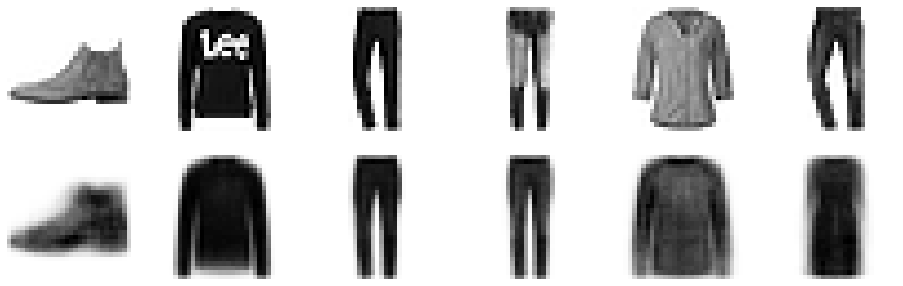

In [ ]:
# Plot examples against reconstructions

f, axs = plt.subplots(2, 6, figsize=(16, 5))

for j in range(6):
    axs[0, j].imshow(example_x[j, :, :].squeeze(), cmap='binary')
    axs[1, j].imshow(example_reconstruction[j, :, :], cmap='binary')
    axs[0, j].axis('off')
    axs[1, j].axis('off')

In [ ]:
# Generate an example - sample a z value, then sample a reconstruction from p(x|z)
z=prior.sample(6)
generated_x=decoder(z).mean() #"sample" looks less realistic than "mean"



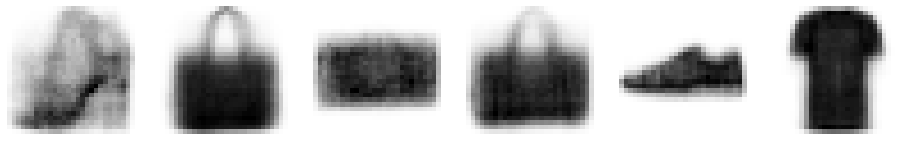

In [ ]:
# Display generated_x

f, axs = plt.subplots(1, 6, figsize=(16, 5))
for j in range(6):
    axs[j].imshow(generated_x[j, :, :].numpy().squeeze(), cmap='binary')
    axs[j].axis('off')

In [ ]:
# -ELBO estimate using an estimate of the KL divergence #MONTE CARLO LOSS

def loss(x, encoding_dist, sampled_decoding_dist,
         prior, sampled_z):
    recon_loss = -sampled_decoding_dist.log_prob(x)
    kl_approx = (encoding_dist.log_prob(sampled_z)
                    - prior.log_prob(sampled_z))
    return tf.reduce_sum(kl_approx + recon_loss)

***
<a class="anchor" id="tutorial4"></a>
# KL divergence layers

In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Flatten, Reshape
import matplotlib.pyplot as plt
import numpy as np

In [73]:
# Import Fashion MNIST

(x_train, _), (x_test, _) = tf.keras.datasets.fashion_mnist.load_data()
x_train = x_train.astype('float32')/256. + 0.5/256
x_test = x_test.astype('float32')/256. + 0.5/256
example_x = x_test[:16]

batch_size = 32
x_train = tf.data.Dataset.from_tensor_slices((x_train, x_train)).batch(batch_size)
x_test = tf.data.Dataset.from_tensor_slices((x_test, x_test)).batch(batch_size)

In [74]:
# Define latent_size and the prior, p(z)
latent_size=4
prior=tfd.MultivariateNormalDiag(loc=tf.zeros(latent_size))


In [76]:
# Define the encoding distribution using a tfpl.KLDivergenceAddLoss layer
event_shape=(28,28)
encoder=Sequential([
                    Flatten(input_shape=event_shape),
                    Dense(128,activation='relu'),
                    Dense(64,activation='relu'),
                    Dense(32,activation='relu'),
                    Dense(16,activation='relu'),
                    Dense(tfpl.MultivariateNormalTriL.params_size(latent_size)),
                    tfpl.MultivariateNormalTriL(latent_size),
                    tfpl.KLDivergenceAddLoss(prior) #estimate KL[] q(z|s) || p(z) ]


])
#samples z_j from q(z|x_j)
#then compute the log q(z_j|x_j) - log p(z_j)

In [77]:
# See how `KLDivergenceAddLoss` affects `encoder.losses`
# encoder.losses before the network has received any inputs
encoder.losses


[<tf.Tensor 'kl_divergence_add_loss/kldivergence_loss/batch_total_kl_divergence:0' shape=() dtype=float32>]

In [79]:
# Pass a batch of images through the encoder
encoder(example_x)


<tfp.distributions.MultivariateNormalTriL 'sequential_3_multivariate_normal_tri_l_MultivariateNormalTriL_MultivariateNormalTriL' batch_shape=[16] event_shape=[4] dtype=float32>

In [80]:
# See how encoder.losses has changed
encoder.losses


[<tf.Tensor: shape=(), dtype=float32, numpy=0.5546121>]

In [81]:
# Re-specify the encoder using `weight` and `test_points_fn`
encoder=Sequential([
                    Flatten(input_shape=event_shape),
                    Dense(128,activation='relu'),
                    Dense(64,activation='relu'),
                    Dense(32,activation='relu'),
                    Dense(16,activation='relu'),
                    Dense(tfpl.MultivariateNormalTriL.params_size(latent_size)),
                    tfpl.MultivariateNormalTriL(latent_size),
                    tfpl.KLDivergenceAddLoss(prior,
                    use_exact_kl=False,
                    weight=1.5,
                    test_points_fn=lambda q: q.sample(10),
                    test_points_reduce_axis=0)#estimate KL[] q(z|s) || p(z) ]


])

# (n_samples, batch_size, dim_z)
# z_{ij} is the ith sample for x_j (is at (i,j:) in tensor of samples)
# is mapped to log q(z_{ij}|-log p(z_{ij})
# => tensor of KL divergense has shape (n_samples, batch_size)

In [82]:
# Replacing `KLDivergenceAddLoss`  with `KLDivergenceRegularizer` in the previous (probabilistic) layer
divergence_regularizer = tfpl.KLDivergenceRegularizer(prior,
                                                      use_exact_kl=False,
                                                      test_points_fn=lambda q: q.sample(5),
                                                      test_points_reduce_axis=0)
encoder=Sequential([
                    Flatten(input_shape=event_shape),
                    Dense(128,activation='relu'),
                    Dense(64,activation='relu'),
                    Dense(32,activation='relu'),
                    Dense(16,activation='relu'),
                    Dense(tfpl.MultivariateNormalTriL.params_size(latent_size)),
                    tfpl.MultivariateNormalTriL(latent_size,activity_regularizer=divergence_regularizer)


])


In [83]:
# Specify the decoder, p(x|z)

decoder = Sequential([
    Dense(16, activation='sigmoid', input_shape=(latent_size,)),
    Dense(32, activation='sigmoid'),
    Dense(64, activation='sigmoid'),
    Dense(2*event_shape[0]*event_shape[1], activation='exponential'),
    Reshape((event_shape[0], event_shape[1], 2)),
    tfpl.DistributionLambda(
        lambda t: tfd.Independent(
            tfd.Beta(concentration1=t[..., 0],
                     concentration0=t[..., 1])
        )
    )
])

In [84]:
# Connect the encoder and decoder to form the VAE
vae=Model(inputs=encoder.inputs, outputs=decoder(encoder.outputs))


In [85]:
# Define a loss that only estimates the expected reconstruction error,
# -E_{Z ~ q(z|x)}[log p(x|Z)]
def log_loss(x_true,p_x_given_z): 
  return (-tf.reduce_sum(p_x_given_z.log_prob(x_true)))


In [86]:
# Compile and fit the model
vae.compile(loss=log_loss)
vae.fit(x_train,validation_data=x_test,epochs=10)


Epoch 1/10
1875/1875 [==============================] - 13s 7ms/step - loss: -44153.0898 - val_loss: -50271.3047
Epoch 2/10
1875/1875 [==============================] - 12s 7ms/step - loss: -53086.8281 - val_loss: -54896.8633
Epoch 3/10
1875/1875 [==============================] - 12s 6ms/step - loss: -57602.6367 - val_loss: -59196.3594
Epoch 4/10
1875/1875 [==============================] - 12s 6ms/step - loss: -61659.5898 - val_loss: -63249.6523
Epoch 5/10
1875/1875 [==============================] - 12s 6ms/step - loss: -64533.0938 - val_loss: -65870.9766
Epoch 6/10
1875/1875 [==============================] - 12s 6ms/step - loss: -66393.0312 - val_loss: -67867.2031
Epoch 7/10
1875/1875 [==============================] - 12s 6ms/step - loss: -68179.9375 - val_loss: -68506.2500
Epoch 8/10
1875/1875 [==============================] - 12s 6ms/step - loss: -69206.8125 - val_loss: -69602.7969
Epoch 9/10
1875/1875 [==============================] - 12s 6ms/step - loss: -70485.6250 - val_l

In [87]:
# Generate an example reconstruction
example_reconstruction=vae(example_x).mean().numpy().squeeze()


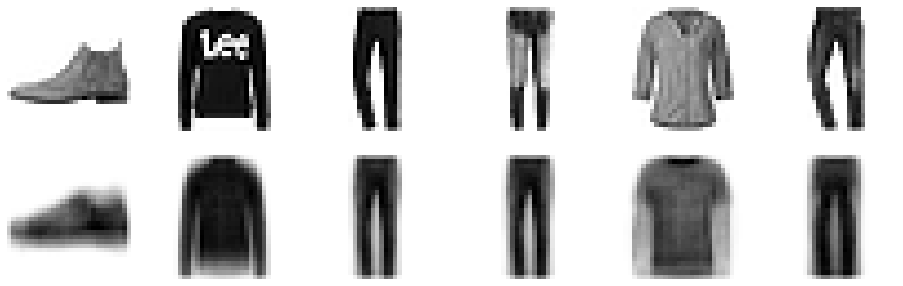

In [88]:
# Plot the example reconstructions

f, axs = plt.subplots(2, 6, figsize=(16, 5))

for j in range(6):
    axs[0, j].imshow(example_x[j, :, :].squeeze(), cmap='binary')
    axs[1, j].imshow(example_reconstruction[j, :, :], cmap='binary')
    axs[0, j].axis('off')
    axs[1, j].axis('off')